In [1]:
#https://www.w3schools.com/python/python_ml_decision_tree.asp

### Machine Learning Lab3: Created by Jibrael Jos,PhD
### Topic: Decision Tree Explorations
### Student Name: Naveen Krishna
### Roll No:23122023
### Date: 15 March
### Submission : 4th April

In [2]:
import pandas
import numpy as np

df = pandas.read_csv("cancerAllv3.csv")
features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']

X = np.array(df)
y= X[:, 30]
X = X[:, 0:9]





In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

In [4]:

features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']
          
import numpy as np
X = np.array(df)
y = X[:,30]
X = X[:,0:9]

print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 3.001e-01 1.471e-01 2.419e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 8.690e-02 7.017e-02 1.812e-01]
 [1.969e+01 2.125e+01 1.300e+02 ... 1.974e-01 1.279e-01 2.069e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 9.251e-02 5.302e-02 1.590e-01]
 [2.060e+01 2.933e+01 1.401e+02 ... 3.514e-01 1.520e-01 2.397e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 0.000e+00 1.587e-01]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True)

(426, 9)


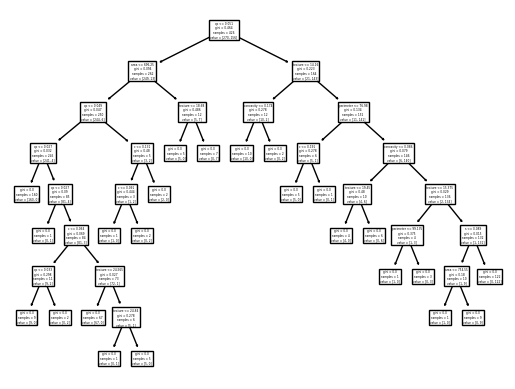

In [6]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf, feature_names=features)
print(X_train.shape)

In [7]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train)
print (accuracy_score(y_train, predicted))

1.0


## Accuracy

In [8]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))

0.916083916083916


## Classification Report

In [9]:
from sklearn.metrics import classification_report
features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        87
         1.0       0.91      0.88      0.89        56

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



## Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix



conf_matrix = confusion_matrix(y_test, y_pred)

print( conf_matrix)

[[82  5]
 [ 7 49]]


## Grid Search

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object for Decision Tree
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Perform grid search on the training data
tree_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model for Decision Tree
best_tree_params = tree_grid_search.best_params_
best_tree_model = tree_grid_search.best_estimator_

# Evaluate the best Decision Tree model on the test set
y_pred = best_tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred)

print("Best Decision Tree hyperparameters:", best_tree_params)
print("Decision Tree Test set accuracy:", tree_accuracy)

Best Decision Tree hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Test set accuracy: 0.9230769230769231
